# The Sparks Foundation - Data Science & Business Analytics Internship

TASK 2 - Prediction using Unsupervised Machine Learning

In this task it is required to predict the optimum number of cluster for the iris data set .iris data set consists of 3 types of flower namely Iris-setosa Iris-versicolour and Iris-virginica

Author: Kavan Prajapati

In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [2]:
# Reading data iris dataset 
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# now we will drop the label column because it is an unsupervised learning problem 
iris = pd.DataFrame(df)
iris_df = iris.drop(columns= ['Species' ,'Id'] )
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Before clustering the data using kmeans, we need to specify the number of clusters. In order to find the optimum number of clusters, there are various methods available like Silhouette Coefficient and the Elbow method. Here, the elbow method is used.


### Brief about the Elbow method

In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.

In [11]:
# Calculating the within-cluster sum of square

within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

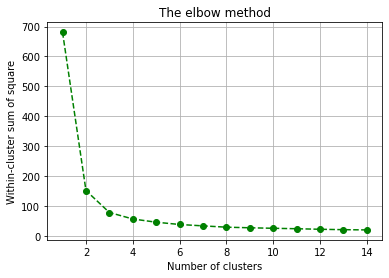

In [12]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

#### we can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'.

In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

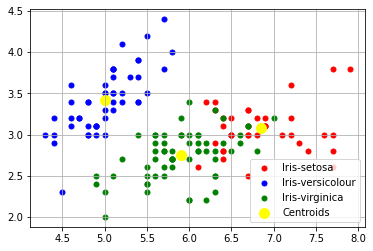

In [14]:

x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()